# Dataset Preparation & Analysis

## Import libraries
Import required libraries to run and access paramertized models, functions and complete project requirements. Ensure that sklearn, gensim, and nltk are installed on your machine.

In [8]:
import sklearn
import gensim
import nltk
import warnings
warnings.filterwarnings("ignore") # To suppress warning messages and keep interface clean

## Import and analyze dataset
Import required libraries to extract and split the dataset.

In [9]:
import gzip
import json
import numpy as np

Load the dataset and store in a numpy array for easier data manipulation.

In [10]:
file = json.load(gzip.open('goemotions.json.gz', 'r'))

data = np.asarray(file) # Store JSON file contents into a numpy array

FileNotFoundError: [Errno 2] No such file or directory: 'goemotions.json.gz'

Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf. This pre-analysis of the dataset will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifiers.

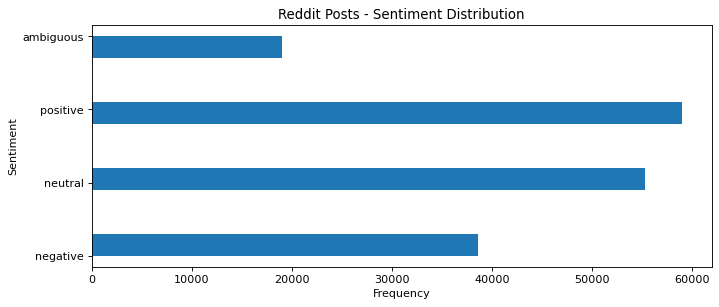

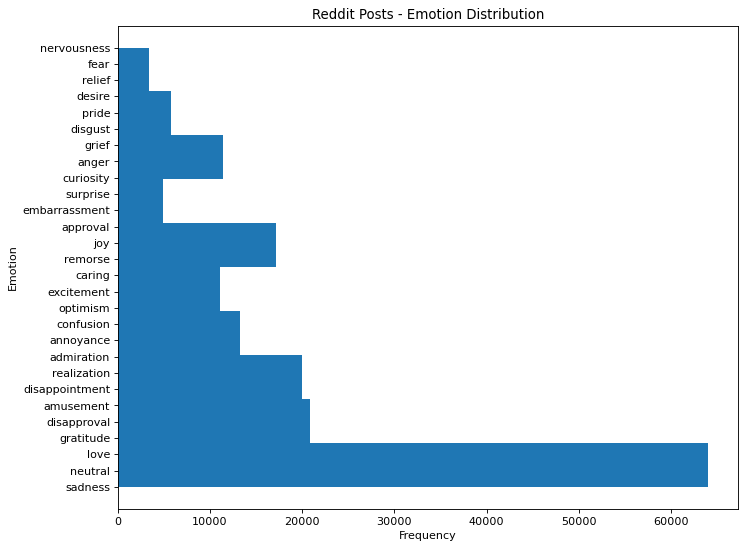

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for graphing and data visualization

# Split data (features (X) and labels (y))
X_posts = data[:,0:1]
y_emotion = data[:,1:2]
y_sentiment = data[:,2:3]


# Sentiment Distribution
plt.figure(figsize=(10, 4), dpi=80)
plt.title('Reddit Posts - Sentiment Distribution')
plt.ylabel('Sentiment')
plt.xlabel('Frequency')
plt.hist(y_sentiment, orientation='horizontal')
plt.savefig('SentimentDistribution.pdf', dpi='figure')
plt.show()

# Emotion Distribution
plt.figure(figsize=(10, 8), dpi=80)
plt.title('Reddit Posts - Emotion Distribution')
plt.ylabel('Emotion')
plt.xlabel('Frequency')
plt.hist(y_emotion, orientation='horizontal')
plt.savefig('EmotionDistribution.pdf', dpi='figure')
plt.show()

## Import Pre-Trained Model
Use gensim.downloader.load to load the word2vec-google-news-300 pretrained embedding model

In [ ]:
import gensim.downloader

model = gensim.downloader.load("word2vec-google-news-300")

Use the tokenizer from nltk to extract words from the Reddit posts. Display the number
of tokens in the training set.

In [ ]:
# Split data (features (X) and labels (y))
X_posts = data[:,0:1]
y_emotion = data[:,1:2]
y_sentiment = data[:,2:3]

# Tokenizing

# Splitting the dataset

Next up, we will split the inputs and labels into training and test sets, 80% and 20% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets for the emotion classifier
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X_posts, y_emotion, test_size=0.2)

# Split into training and test sets for the sentiment classifier
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_posts, y_sentiment, 
                                                                                            test_size=0.2)

In [ ]:
from nltk import word_tokenize
nltk.download('punkt')
# print(len(X_posts.ravel()))
# print(len(data))
# print(X_posts.ravel())
# tokens = X_posts.ravel()

# tokenized_word = [word_tokenize(i) for i in X_posts]
# post_tokens = [post_tokens for post_tokens in tokenized_word]
# print("Number of tokens in Reddit posts:")
# tokens_list = []
# for i in post_tokens:
#     for j in i:
#         tokens_list.append(j)
# print(len(tokens_list))


print(X_train_emotion)
x = str(X_train_emotion)
print(X_train_sentiment)
tokens = word_tokenize(x)
print(tokens)
print("Total tokens:",len(tokens))

[['When you start correcting spelling and grammar you lose automatically my dude. Your points stand by themselves. Being an English teacher just makes you look like a jackass']
 ['If your partner is assaulting/abusing you that’s a dealbreaker.']
 ['If Spider-Man 2 is a “failed movie” then so is The Dark Knight and all the LOTR movies.']
 ...
 ['They’re more just controversial opinions, not unpopular ones. ']
 ["Wow. You have literally no idea how American politics works. It's almost as if you're either a bot or a troll."]
 ['[NAME]! He was just amazing, best contract ever, so sad when we lost him. ']]
[['I once got flowers from a girl... idk why but it just feels good']
 ['Leave it. You should never date someone with a scheduled time you are going to break up with them.']
 ['Wow, that’s a big 3 year old!']
 ...
 ['[NAME] that was so awful I collapsed into a singularity']
 ['[NAME] please don’t come to the USA. We’d love to have you...but you don’t need to deal with this.']
 ['Married t

[nltk_data] Downloading package punkt to /Users/vatsashah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Word2Vec

In [ ]:
from gensim.models import word2vec;

# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 40;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.

print("Training model...");
model = word2vec.Word2Vec(LineSentence('/mnt/big/out_full_clean'), workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model
model_name = "model_full_reddit";
model.save(model_name);

In [ ]:
print(X_posts)
print(X_posts.ravel())

[['That game hurt.']
 ["You do right, if you don't care then fuck 'em!"]
 ['Man I love reddit.']
 ...
 ['Well when you’ve imported about a gazillion of them I or your country it’s gets serious.']
 ['That looks amazing']
 ["The FDA has plenty to criticize. But like here, it's usually criticized horribly off base. It needs to grow some balls and actually enforce things. "]]
['That game hurt.' "You do right, if you don't care then fuck 'em!"
 'Man I love reddit.' ...
 'Well when you’ve imported about a gazillion of them I or your country it’s gets serious.'
 'That looks amazing'
 "The FDA has plenty to criticize. But like here, it's usually criticized horribly off base. It needs to grow some balls and actually enforce things. "]


# Base Multi-Layered Perceptron Classifier

Here we will train a base multi-layered perceptron classifier with the default parameters selected.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseMLP_model = MLPClassifier(max_iter=1) 
baseMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report")
print(classification_report(y_test_emotion, baseMLP_model.predict(X_test_emotion)))
cm = confusion_matrix(y_test_emotion, baseMLP_model.predict(X_test_emotion), labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

In [ ]:
# Sentiment Classification 
baseMLP_model = MLPClassifier()
baseMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report")
print(classification_report(y_test_sentiment, baseMLP_model.predict(X_test_sentiment)))
cm = confusion_matrix(y_test_sentiment, baseMLP_model.predict(X_test_sentiment), labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
disp.plot()
plt.show()

# Top Multinomial Naive Bayes Classifier

A better performing Multinomial Naive Bayes Classifier found using GridSearchCV. The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search best alphafloat value
MNB_model = MultinomialNB()
hyper_parameters = {'alpha':(0, 0.5, 1, 1.5, 2, 2.5)}

gridSearchMNB = GridSearchCV(MNB_model, hyper_parameters, n_jobs=-1)

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMNB.fit(X_train_emotion, y_train_emotion.ravel())
print('[EMOTION] Best Hyperparameter Configuration:', gridSearchMNB.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMNB.fit(X_train_sentiment, y_train_sentiment.ravel())
print('[SENTIMENT] Best Hyperparameter Configuration:', gridSearchMNB.best_params_)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification
topMNB_model = MultinomialNB(alpha=0.5)
topMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report")
print(classification_report(y_test_emotion, topMNB_model.predict(X_test_emotion)))
cm = confusion_matrix(y_test_emotion, topMNB_model.predict(X_test_emotion), labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
disp.plot()
plt.show()

# Sentiment Classification 

# No change in hyperparameter configuration, so the 'best' performing model is equivalent to base model.
# Because of this, we will not gather the performance report of the top model, and can refer to the base model
# for performance metrics.